In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, minimize_scalar, minimize
import sympy as sym

%matplotlib notebook
%matplotlib inline

# Newton-Raphson Method


Using the Newton-Raphson method to find roots of a function.


$x_{i+1} = x_i - \frac{{f(x_i)} }{{df(x_i)}}$

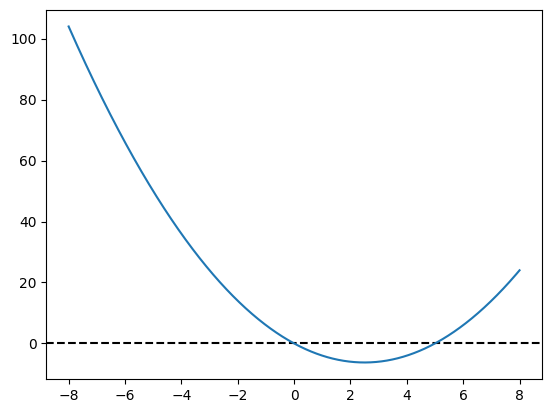

-1.4431070514782548e-22
-0.0


In [2]:
# Define the function
def f(x):
    return x**2-5*x

# Define the derivative of the function
def df(x):
    return x*2-5 


xmin, xmax = -8,8
x = np.linspace(xmin, xmax, 1000)
y_true = f(x)

plt.axhline(y=0, color='black', linestyle='--')  # add line y=0
plt.plot(x, y_true)
plt.show()


x0 = -4
root = newton(f, x0, df)
print(root)
print(np.round(root,4))

---

# Exersice 1

- Implement the Newton-Raphson method from scratch (without using the "newton" library).

In [3]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=1000):
    iter = 0
    for _ in range(max_iter):
        iter += 1
        x1 = x0 - (f(x0) / df(x0))
        movement = np.abs(x1 - x0)
        if movement < tol:
            break
        else:
            x0 = x1
    print(f"{iter} iterations before convergence")
    return x1

x0 = 4
root = newton_raphson(f, df, x0)
print(np.round(root, 4))

5 iterations before convergence
5.0


---

# Gradient Descent

$x_{i+1} = x_i - \gamma \bigtriangledown f(x_i)$

In [4]:
x, y_true = sym.symbols('x y')
f = (x**2 + y_true**2)
df_dx = f.diff(x)
df_dy = f.diff(y_true)

x0 = [2,-2] # initial guess
alpha = 0.01 # learning rate
max_iter = 1000 # maximum number of iterations
x_n = np.array(x0)
x_history = [x0]

for i in range(max_iter):
    grad = np.array([df_dx.subs(x,x_n[0]), df_dy.subs(y_true,x_n[1])])
    x_n = x_n - alpha * grad
    x_history.append(x_n)

    
x_history = np.array(x_history)
x_min = x_n[0]
y_min = x_n[1]

print(x_min, y_min, f.subs({x:x_min, y_true:y_min}))


3.36593471443191e-9 -3.36593471443191e-9 2.26590330036356e-17


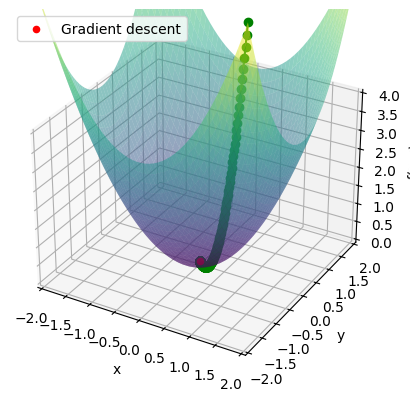

In [5]:
# Define the range of x and y values
x_values = np.linspace(-2, 2, 50)
y_values = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x_values, y_values)
Z = X**2 + Y**2


# Define the figure and axes for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the function 
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Set the limits and labels for the axes
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

ax.scatter(x_min, y_min, color='red', marker='o', label='Gradient descent')
ax.plot3D(x_history[:, 0], x_history[:, 1], (x_history[:, 0]**2+x_history[:, 1]**2), marker='o', color='green', alpha=1)

# Add legend and show the plot
ax.legend()
plt.show()

# Exercise 2
Consider a linear function $(w*x +w_0)$ is used to model the following dataset  and the loss function is mean sqaure error (MSE) as follows.

$ MSE = \frac{1}{N}\sum_{i=1}^{N}(w*x_i +w_0 - y_i)^2 $
    
- Plot the mean square error loss with respect to the parameters of your linear method (slope and intercept). Notice that you are not asked to train the linear model to find the best parameters. It is only to plot the loss with respect to the parameters.

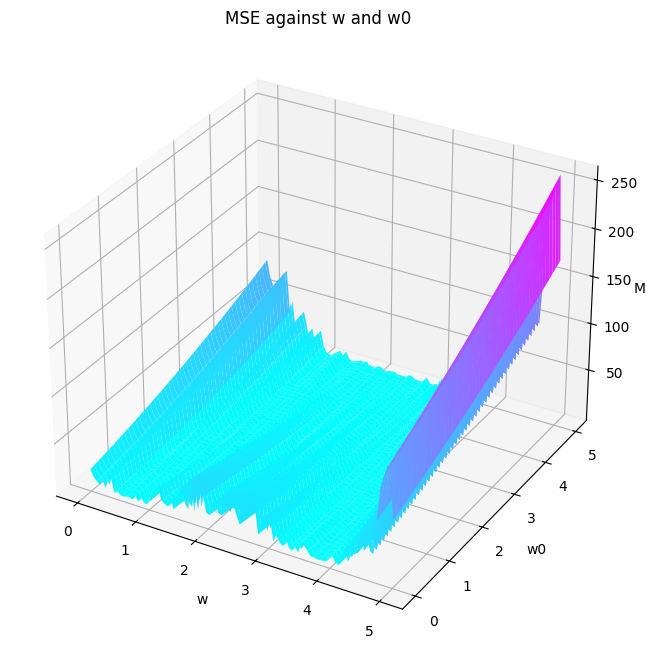

In [6]:
#Anwser exersice 2
x = np.linspace(-5, 5, 100)
w = 2
w0 = 3 + 4 * np.random.rand(len(x)) 
y_true = w * x + w0

w_ = np.linspace(0, 5, 100)
w0_ = np.linspace(0, 5, 100)
w_grid, w0_grid = np.meshgrid(w_, w0_)

y_pred = w_grid * x + w0_grid
mse = ((y_pred - y_true) ** 2)

#plotting
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_grid, w0_grid, mse, cmap='cool')
ax.set_title('MSE against w and w0')
ax.set_xlabel('w')
ax.set_ylabel('w0')
ax.set_zlabel('MSE')
ax.grid()

plt.show()

---

# Exercise 3

- Select an initial slope and intercept.
- Use gradient descent in 2 dimension to update slope and intercept iteratively.
- Plot the points on the loss function in the previous exercise.
- For each new slope and intercept plot the line on the scatter plot to see how it fits the data (choose few iterations for plotting).

In [7]:
# Gradient descent function

def GD(x, y_true, w, w0, alpha=0.01, num_iter=1000):
    w_history = []
    w0_history =[]
    error_history =[]

    for _ in range(num_iter):
        y_pred = w*x + w0

        w_history.append(w)
        w0_history.append(w0)
        error_history.append(np.mean((y_true - y_pred)**2))

        f = y_true - y_pred
        w -= alpha * (-2/ len(x) * np.sum(x * f))
        w0 -= alpha * (-2/ len(x) * np.sum(f))

    return w, w0, np.array(w_history), np.array(w0_history), np.array(error_history)

In [8]:
#Initial slope and intercept
w = 8
w0 = 4

# call GD to fit the dataset
opt_w, opt_w0, w_history, w0_history, error_history = GD(x, y_true, w, w0)

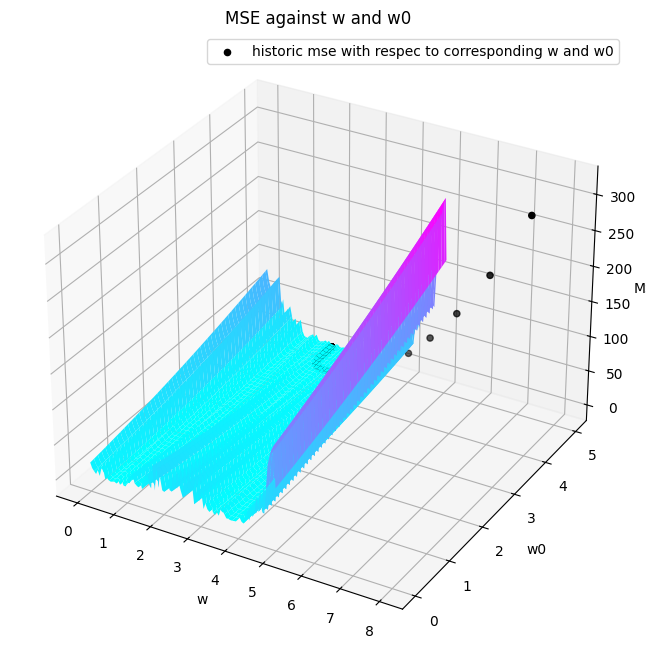

In [9]:
# plot points (found during the optimization) on the loss surface
w_ = np.linspace(0, 5, 100)
w0_ = np.linspace(0, 5, 100)
w_grid, w0_grid = np.meshgrid(w_, w0_)

y_pred = w_grid * x + w0_grid
mse = ((y_pred - y_true) ** 2)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(w_grid, w0_grid, mse, cmap='cool')
ax.scatter3D(w_history, w0_history, error_history, marker='o', c='black', label='historic mse with respec to corresponding w and w0')

ax.set_title('MSE against w and w0')
ax.set_xlabel('w')
ax.set_ylabel('w0')
ax.set_zlabel('MSE')
ax.legend()
ax.grid()

plt.show()

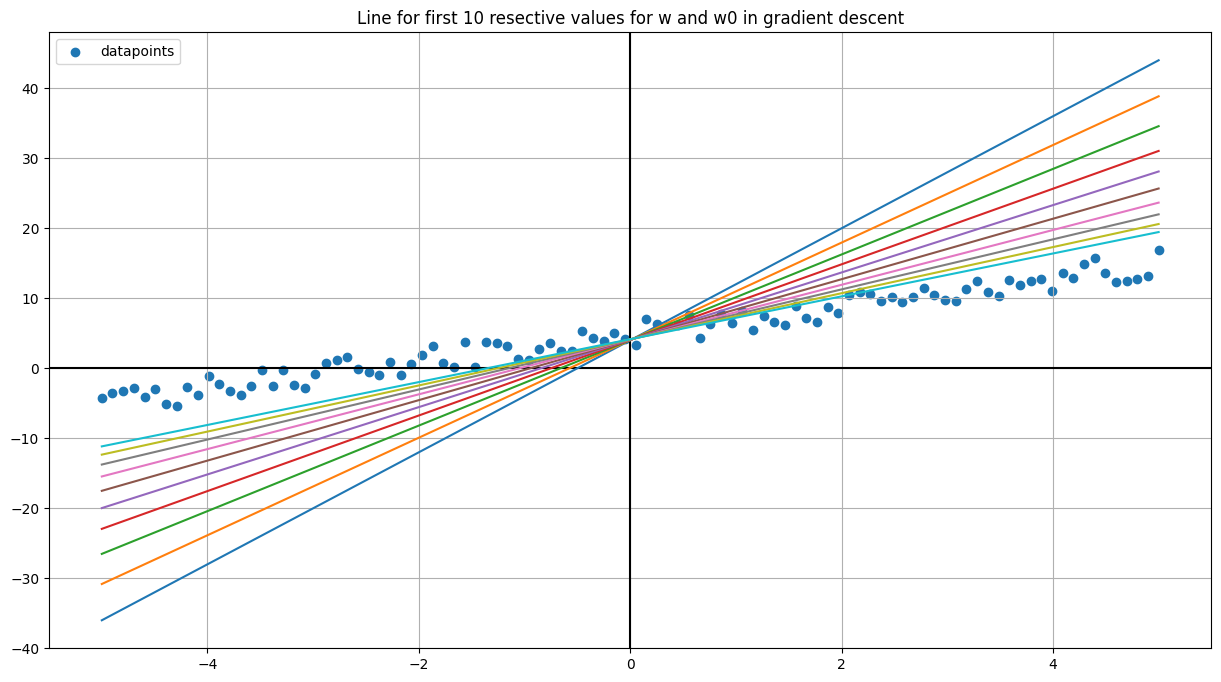

In [10]:
# For each new slope and intercept plot the line on the scatter plot to see how it fits the data (choose few iterations for plotting). 

n_lines = 10

plt.figure(figsize=(15, 8))
plt.grid()
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.scatter(x, y_true, label='datapoints')
plt.title(f'Line for first {n_lines} resective values for w and w0 in gradient descent')

for i, j in zip(w_history, w0_history):
    line = (i * x + j)
    plt.plot(x, line)
    n_lines -= 1
    if n_lines == 0:
        break

plt.legend()
plt.show()

# Exercise 4
- Use 0.01, 0.002 and 0.001 as your learning rate and num_iter = 2000 and run GD. 
- Plot learning curve for each learning rate (error on the y-axis and iteration on the x-axis).

In [11]:
# Use 0.01, 0.002 and 0.001 as your learning rate and num_iter = 2000.

# call GD to fit the dataset
opt_w_lr1, opt_w0_lr1, w_history_lr1, w0_history_lr1, error_history_lr1 = GD(x, y_true, w, w0, 0.01, 2000)
opt_w_lr2, opt_w0_lr2, w_history_lr2, w0_history_lr2, error_history_lr2 = GD(x, y_true, w, w0, 0.002, 2000)
opt_w_lr3, opt_w0_lr3, w_history_lr3, w0_history_lr3, error_history_lr3 = GD(x, y_true, w, w0, 0.001, 2000)

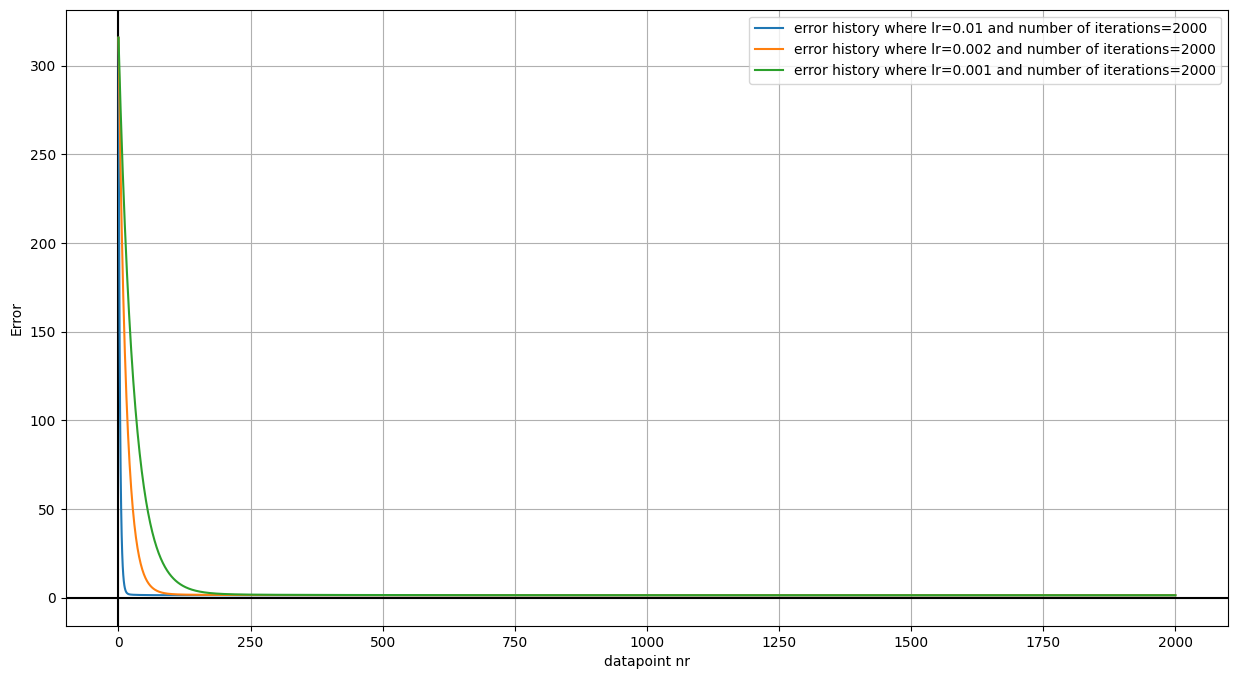

In [12]:
# Plot learning curve for each learning rate (error on the y-axis and iteration on the x-axis).
plt.figure(figsize=(15, 8))
plt.grid()
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.xlabel('datapoint nr')
plt.ylabel('Error')

iterations = np.linspace(0, 2000, 2000)

plt.plot(iterations, error_history_lr1, label='error history where lr=0.01 and number of iterations=2000')
plt.plot(iterations, error_history_lr2, label='error history where lr=0.002 and number of iterations=2000')
plt.plot(iterations, error_history_lr3, label='error history where lr=0.001 and number of iterations=2000')

plt.legend()
plt.show()